In [1]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,AveragePooling2D,GlobalAveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
data_dir="E:/Python ML/data"

In [3]:
import os
data=[]
for file in os.listdir(data_dir):
    data+=[file]
print(data)
print(len(data))

['cloudy', 'desert', 'green_area', 'water']
4


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.3)

In [5]:
train_data=train_datagen.flow_from_directory(data_dir,target_size=(128,128),subset='training')
test_data=train_datagen.flow_from_directory(data_dir,target_size=(128,128),subset='validation')

Found 3942 images belonging to 4 classes.
Found 1689 images belonging to 4 classes.


In [6]:
train_data.image_shape

(128, 128, 3)

In [7]:

model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      73792     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 32)      18464     
_________________________________________________________________
flatten (Flatten)            (None, 476288)            0         
_________________________________________________________________
dense (Dense)                (None, 4)                 1905156   
Total params: 2,000,996
Trainable params: 2,000,996
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='Adam',
        loss='CategoricalCrossentropy',
        metrics=['accuracy'])

In [9]:
hist = model.fit_generator(train_data,
               epochs=2,
                validation_data=(test_data),verbose=1)

C:\Users\Likith\AppData\Roaming\Python\Python36\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
124/124 [==============================] - 617s 5s/step - loss: 0.9934 - accuracy: 0.5046 - val_loss: 0.7118 - val_accuracy: 0.4606
Epoch 2/2
124/124 [==============================] - 544s 4s/step - loss: 0.5719 - accuracy: 0.7296 - val_loss: 0.4137 - val_accuracy: 0.8401


In [10]:
model.evaluate(test_data)
model.save('model.h5')

53/53 [==============================] - 41s 783ms/step - loss: 0.4137 - accuracy: 0.8401


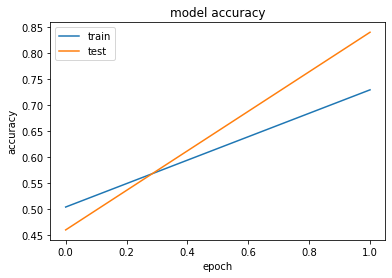

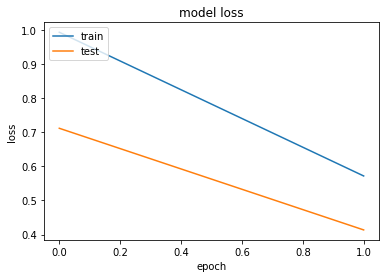

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

[2.3756735e-02 9.7623640e-01 1.5936079e-08 6.8754994e-06]


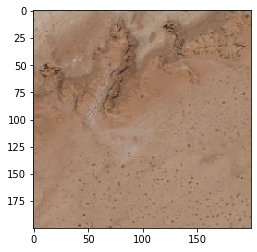

Prediction: desert


In [12]:
from skimage import io
from keras.preprocessing import image

img = image.load_img(r'E:\Python ML\data\desert\desert(6).jpg', grayscale=False, target_size=(128,128,3))
show_img=image.load_img(r'E:\Python ML\data\desert\desert(6).jpg', grayscale=False, target_size=(200, 200,3))
data =data
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',data[ind])

# Mobilenet algorithm

In [13]:
model1 = tf.keras.applications.mobilenet_v2.MobileNetV2()

model1 = Sequential()
model1.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model1.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model1.add(Flatten())
model1.add(Dense(4,activation='softmax'))
model1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 128)     3584      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 124, 64)      73792     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 122, 122, 32)      18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 476288)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1905156   
Total params: 2,000,996
Trainable params: 2,000,996
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='Adamax',
        loss='CategoricalCrossentropy',
        metrics=['accuracy'])

In [15]:
hist = model.fit_generator(train_data,
               epochs=2,
                validation_data=(test_data),verbose=1)

Epoch 1/2
124/124 [==============================] - 519s 4s/step - loss: 0.4298 - accuracy: 0.8351 - val_loss: 0.3187 - val_accuracy: 0.8674
Epoch 2/2
124/124 [==============================] - 509s 4s/step - loss: 0.3061 - accuracy: 0.8780 - val_loss: 0.3259 - val_accuracy: 0.8680


In [16]:
model.evaluate(test_data)
model.save('model.h5')

53/53 [==============================] - 42s 789ms/step - loss: 0.3259 - accuracy: 0.8680


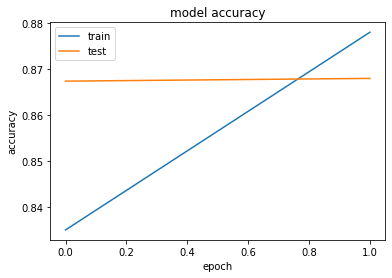

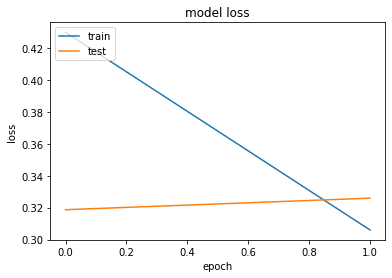

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

[4.4344217e-03 1.0393309e-05 7.2962540e-01 2.6592985e-01]


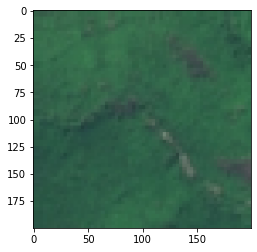

Prediction: green_area


In [18]:
from skimage import io
from keras.preprocessing import image

img = image.load_img(r'E:\Python ML\data\green_area\Forest_299.jpg', grayscale=False, target_size=(128,128,3))
show_img=image.load_img(r'E:\Python ML\data\green_area\Forest_299.jpg', grayscale=False, target_size=(200, 200,3))
data =data
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',data[ind])